In [1]:
import ROOT
import ctypes
from main.data_tools.extract_ntuples import get_pd, get_np
import matplotlib.pyplot as plt


Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [3]:

sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi/standard.root")
# sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg_tight_treefit/topo/resultfile/result_phi/standard.root")

signal_1ab_tree = sig_1ab_file.Get("phi")

D0bar_sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi_cc/standard.root")
# D0bar_sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg_tight_treefit/topo/resultfile/result_phi_cc/standard.root")

D0bar_signal_1ab_tree = D0bar_sig_1ab_file.Get("phi_cc")

In [4]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.72,1.92)
D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.68, 2.05)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 1.9)

D0_cosHel_TH1F = ROOT.TH1F("D0_cosHel_TH1F","D0_cosHel",40, -1, 1)


In [5]:
def extract_hist_coshel(tree, histogram):
    for event in tree:
        if ( event.iCascDcyBrP_Dst_0 !=4 and event.iCascDcyBrP_Dst_0 !=0 and event.iCascDcyBrP_Dst_0 !=1  ) and event.D0_M > 1.68 and event.D0_M < 2.05 and event.v > 0.023:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

In [6]:
# def apply_cuts(tree, histogram):
#     for event in tree:
#         # if event.D0_M > 1.67 and event.D0_M < 2.06:
#         if event.D0_M > 1.78 and event.D0_M < 1.92:

#             histogram.Fill(event.D0_M)
#     return histogram

In [7]:
def extract_signals(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==63 and event.D0_M > 1.67 and event.D0_M < 2.06:
        # if (event.iCascDcyBrP_Dst_0 !=0 and event.iCascDcyBrP_Dst_0 !=1) and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.02:

        if (event.iCascDcyBrP_Dst_0 !=4 and event.iCascDcyBrP_Dst_0 !=0) and event.D0_M > 1.68 and event.D0_M < 2.05 and event.dM_pi0_75MeV > 0.023:
        # if (event.iCascDcyBrP_Dst_0 !=0 and event.iCascDcyBrP_Dst_0 !=1 ) and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.02:

            histogram.Fill(event.D0_M)
    return histogram

In [8]:
def extract_signals_D0bar(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 2.06:
        if (event.iCascDcyBrP_Dstm_0 !=4 and event.iCascDcyBrP_Dstm_0 !=0) and event.D0_M > 1.68 and event.D0_M < 2.05 and event.dM_pi0_75MeV > 0.023:
        # if ( event.iCascDcyBrP_Dst_0 ==0) and event.D0_M > 1.67 and event.D0_M < 1.9 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_M)
    return histogram

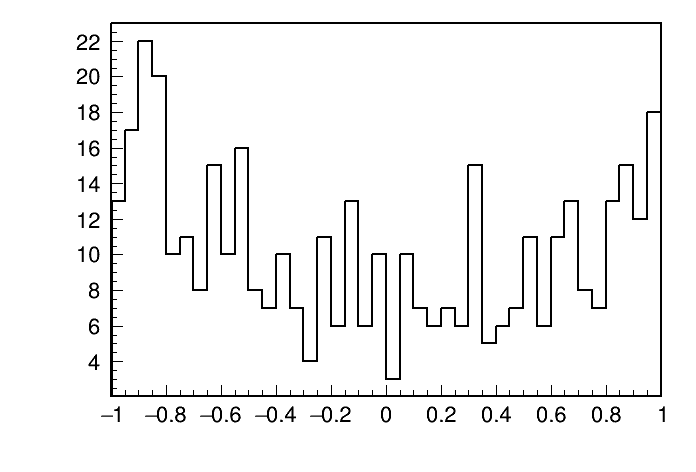

In [9]:

D0_cosHel_TH1F = extract_hist_coshel(signal_1ab_tree, D0_cosHel_TH1F)
c1 = ROOT.TCanvas()
D0_cosHel_TH1F.Draw()
c1.Draw()

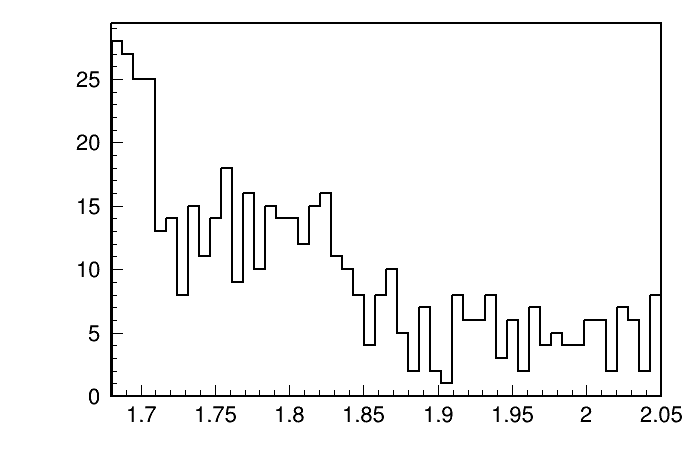

In [10]:

D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

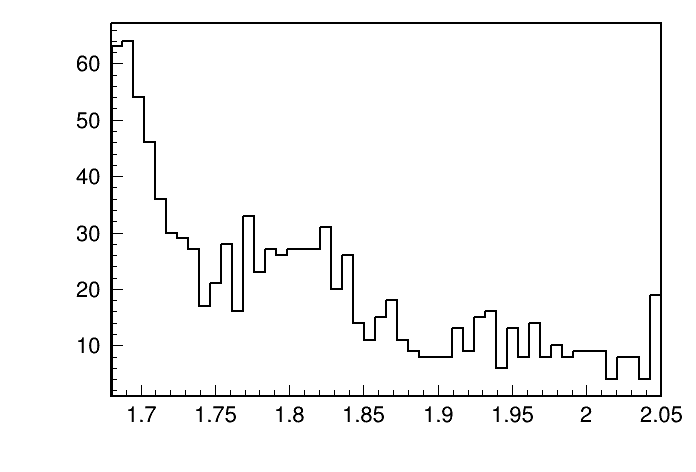

In [11]:
D0_M_TH1F_2 = extract_signals_D0bar(D0bar_signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

In [39]:

base_filter=' D0_M>1.68 && D0_M<2.05 && dM_pi0_75MeV > 0.023 && iCascDcyBrP_Dst_0 !=0'
file = "/media/jykim/T7/storage/01_recon//massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi/standard.root"


tree = 'phi'
variables = ['D0_M','iCascDcyBrP_Dst_0']

pd_phigamma_ccbar_remain  = get_pd(file, tree, base_filter, variables)

77
76
53
36
35
30
28
24
20
15


(1.68, 2.05)

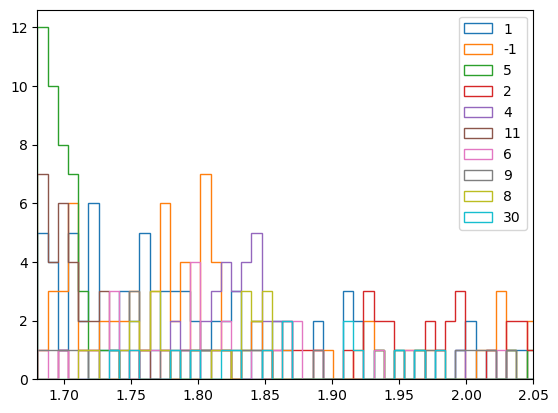

In [41]:
import numpy as np
bkg_listing = pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(10)

for i in range(10):
    #decay_chain = bkg_listing.index[i]
    
    #cut = 'iCascDcyBrP_Dst_0 = ' + decay_chain
    df = pd_phigamma_ccbar_remain[pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0']==pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[i]]
    plt.hist(df.D0_M, bins=np.linspace(1.68,2.06,51), histtype='step',label=pd_phigamma_ccbar_remain['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[i], stacked=True);
    
    
    
    # plt.show()
    # plt.clf()
    print(len(df))
    
    
plt.legend()
plt.xlim(1.68,2.05)

In [14]:

# D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# # D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

# c1 = ROOT.TCanvas()
# D0_M_TH1F_2.Draw()
# c1.Draw()

In [15]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [16]:
# scale_factor

In [12]:
fitting_region = (1.68, 2.05)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(40)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [13]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.80,1.75, 1.85)


# mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.6,1.1, 1.8)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.025,0.02,0.03)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.5)
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,10)

x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.2, -1,1)
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c1",0.2, -1,1)
x_bkg2_c2 = ROOT.RooRealVar("x_bkg2_c2", "c1",0.2, -1,1)

# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)


[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.68,2.05]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.68,2.05]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_model_sighist' created with bounds [1.68,2.05]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable ! 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions will be evaluated in

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file phi_massveto_1ab_except_Vpi0_signal.png has been created


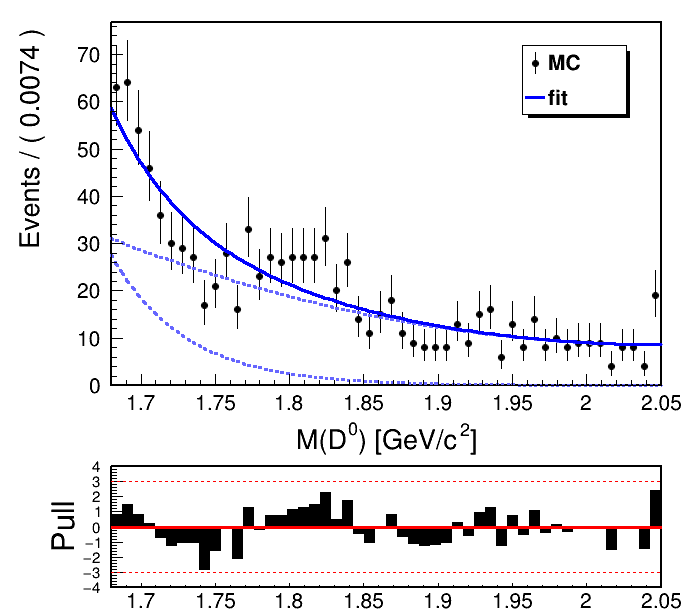

In [14]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
# sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)

# sig2 = ROOT.RooExponential("sig2", "Signal component 1", x, tau)

sig2 = ROOT.RooPolynomial("sig2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
# sig2 = ROOT.RooPolynomial("sig2", "Signal component 1", x,x_bkg2_c0)

sig3 = ROOT.RooExponential("sig3", "Signal component 1", x, tau)



# # sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# # # sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)



# sig2 = ROOT.RooPolynomial("sig2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# temp_sig1 = ROOT.RooAddPdf("temp_sig1", "model", [sig1, sig2], sig1frac)

sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)

# # model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# model = ROOT.RooAddPdf("model", "model", [sig3, temp_sig1], sig2frac)

# model = ROOT.RooPolynomial("model", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
# model = ROOT.RooExponential("model", "Signal component 1", x, tau)

model = ROOT.RooAddPdf("model", "model", [sig2, sig3], sig2frac)

r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
# canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/phi_massveto_1ab_Vpi0.png")
canv.SaveAs("phi_massveto_1ab_except_Vpi0_signal.png")

f = ROOT.TFile("phig_MC15ri_1ab_others_fitresult.root", "RECREATE")
r.Write("phig")
f.Close()


In [22]:
model.Print("t")

0x559d6ee68960 RooAddPdf::model = 0.0162509 [Auto,Dirty] 
  0x559d6ee764b0/V- RooPolynomial::sig2 = 0.0199799 [Auto,Dirty] 
    0x559d6d83c410/V- RooRealVar::M(D^{0}) = 1.865
    0x559d6dbe4650/V- RooRealVar::x_bkg2_c0 = -0.965174 +/- 0.0227757
    0x559d6dcca880/V- RooRealVar::x_bkg2_c1 = 0.235761 +/- 0.0104822
  0x559d6ee64670/V- RooRealVar::sig2frac = 0.813361 +/- 0.0533013
  0x559d66ada3c0/V- RooExponential::sig3 = 6.32149e-17 [Auto,Dirty] 
    0x559d6d83c410/V- RooRealVar::M(D^{0}) = 1.865
    0x559d6dcfab00/V- RooRealVar::tau = -20 +/- 2.38966


In [176]:
f = ROOT.TFile.Open("phig_signalMC_fitresult.root")
r2 = ROOT.gDirectory.Get("phig_sig")
f.Close()


In [177]:
r2.Print()


  RooFitResult: minimized FCN value: -474.561, estimated distance to minimum: 0.000109352
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                  mean    1.6697e+00 +/-  1.57e-02
              sig1frac    1.3032e-01 +/-  3.10e-02
                sigma1    1.7543e-02 +/-  7.53e-03
             x_bkg2_c0   -8.6002e-01 +/-  2.69e-02
             x_bkg2_c1    1.8454e-01 +/-  1.28e-02



In [252]:
r2.correlation("x_bkg2_c0","x_bkg2_c1")

-0.9970898017367656

In [253]:
r2.edm()

6.09083150632482e-05

In [174]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x55911d930f10>

In [15]:
# sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
# signal_tree = sig_file.Get("phi")


# # sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
# # signal_1ab_tree = sig_1ab_file.Get("phi")



sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi/standard.root")
# sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg_tight_treefit/topo/resultfile/result_phi/standard.root")

signal_tree = sig_1ab_file.Get("phi")

D0bar_sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_phi_cc/standard.root")
# D0bar_sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg_tight_treefit/topo/resultfile/result_phi_cc/standard.root")

D0bar_signal_tree = D0bar_sig_1ab_file.Get("phi_cc")

In [16]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
TH1F = ROOT.TH1F("D0_cosHel_0_TH1F","D0 mass",50,-1,1)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.72,1.92)


In [17]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        if  (event.iCascDcyBrP_Dst_0 !=4 and event.iCascDcyBrP_Dst_0 !=0  )  and event.D0_M > 1.68 and event.D0_M < 2.05 and event.dM_pi0_75MeV > 0.023:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

In [18]:
def extract_signals_D0bar(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 2.06:
        if (event.iCascDcyBrP_Dstm_0 !=4 and event.iCascDcyBrP_Dstm_0 !=0) and event.D0_M > 1.68 and event.D0_M < 2.05 and event.dM_pi0_75MeV > 0.023:
        # if ( event.iCascDcyBrP_Dst_0 ==0) and event.D0_M > 1.67 and event.D0_M < 1.9 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

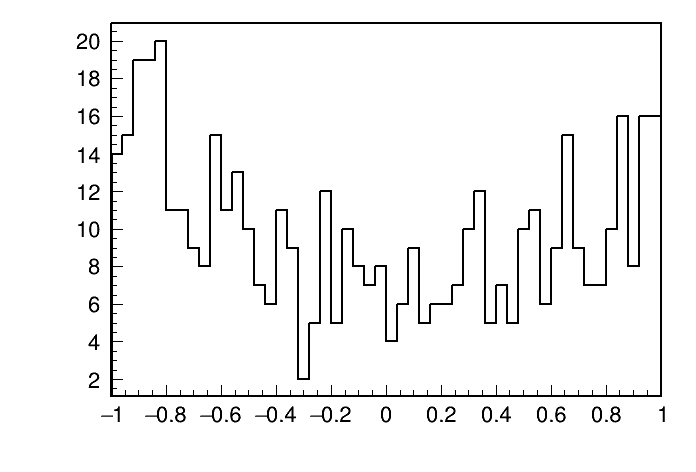

In [19]:

TH1F = apply_cuts(signal_tree, TH1F)
c1 = ROOT.TCanvas()
TH1F.Draw()
c1.Draw()

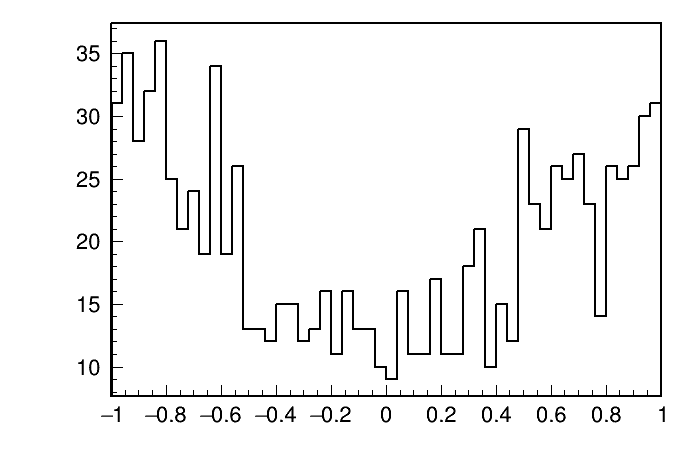

In [20]:

TH1F = extract_signals_D0bar(D0bar_signal_tree, TH1F)
c1 = ROOT.TCanvas()
TH1F.Draw()
c1.Draw()

In [21]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared", "x,c0", "", "c0*x*x")
# ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared.cxx+")

In [22]:
fitting_region = (-1,1)
x = ROOT.RooRealVar("M(D^{0})", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)

signalhist = ROOT.RooDataHist("sighist", "sighist", l, TH1F, 1)


In [23]:
c0 = ROOT.RooRealVar("c0", "c0",0.5, -1,1)
c1 = ROOT.RooRealVar("c1", "c0",0.5, -1,1)

# model = ROOT.MyPdf_xsquared("model", "pdf", x, c0)


[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [-1,1]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [-1,1]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_model_sighist' created with bounds [-1,1]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: 636.966, estimated distance to minimum: 6.56172e-07
                covariance

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file phi_massveto_1ab_other_helicity.png has been created


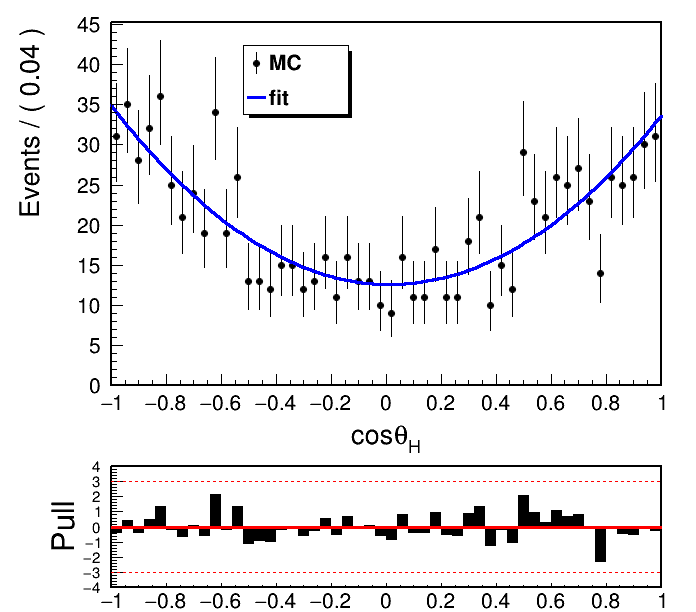

In [24]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
# sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# # sig1 = ROOT.RooJohnson("sig1", "Signal component 1", x,mu, para_lambda,gamma,delta)

# sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# # sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# model = ROOT.RooPolynomial("model", "Signal component 1", x, ROOT.RooArgList(c0, c1))

model = ROOT.RooChebychev("model", "Signal component 1", x, ROOT.RooArgList(c0, c1))

# x_bkg2_model = ROOT.RooChebychev("x_bkg2_model", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
#


# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

# model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)
# 
# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# # sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.35, 0.75, 0.50, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
#canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/phi_massveto_1ab_signal.png")
canv.SaveAs("phi_massveto_1ab_other_helicity.png")

f = ROOT.TFile("phig_MC15ri_others_helicity_fitresult.root", "RECREATE")
r.Write("phig")
f.Close()
